<a href="https://colab.research.google.com/github/Ar-Anik/Machine_Learning/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Bangla Book Link](https://datasinsightsbd.gitbook.io/dsbook/undefined/kmeans)

[Bangla Video Link1](https://youtu.be/iIaClHApAjQ)

[Bangla Video Link2](https://youtu.be/I_ZLD4rcdFc)

[English Video Link](https://youtu.be/4b5d3muPQmA)

[For Coding](https://youtu.be/EItlUEPCIzM)


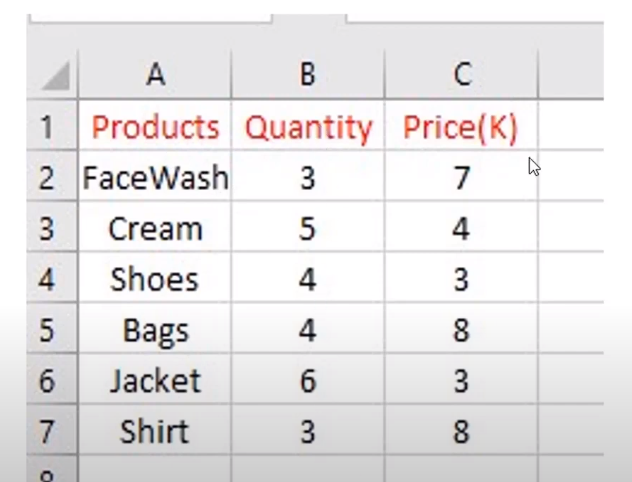

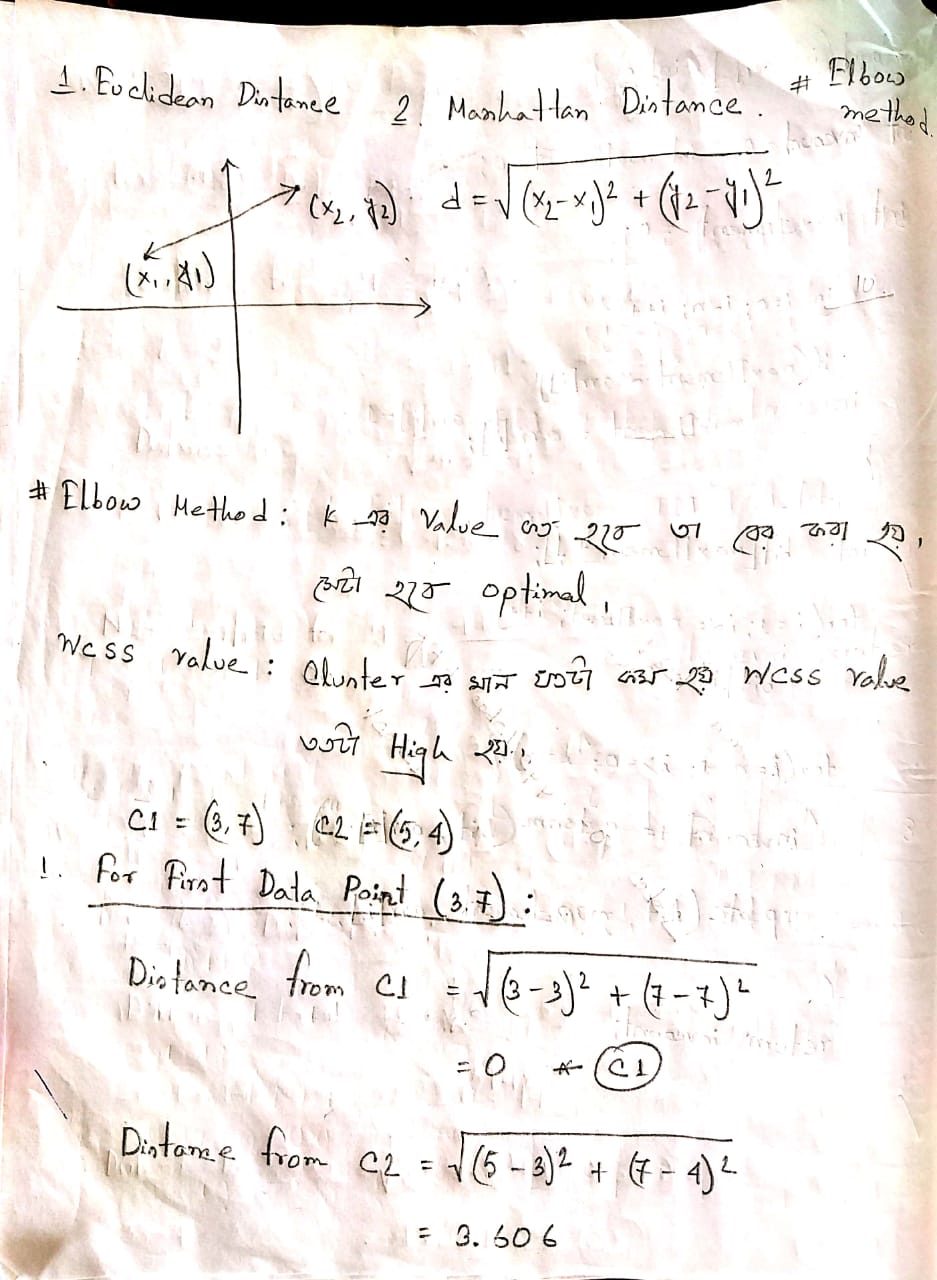

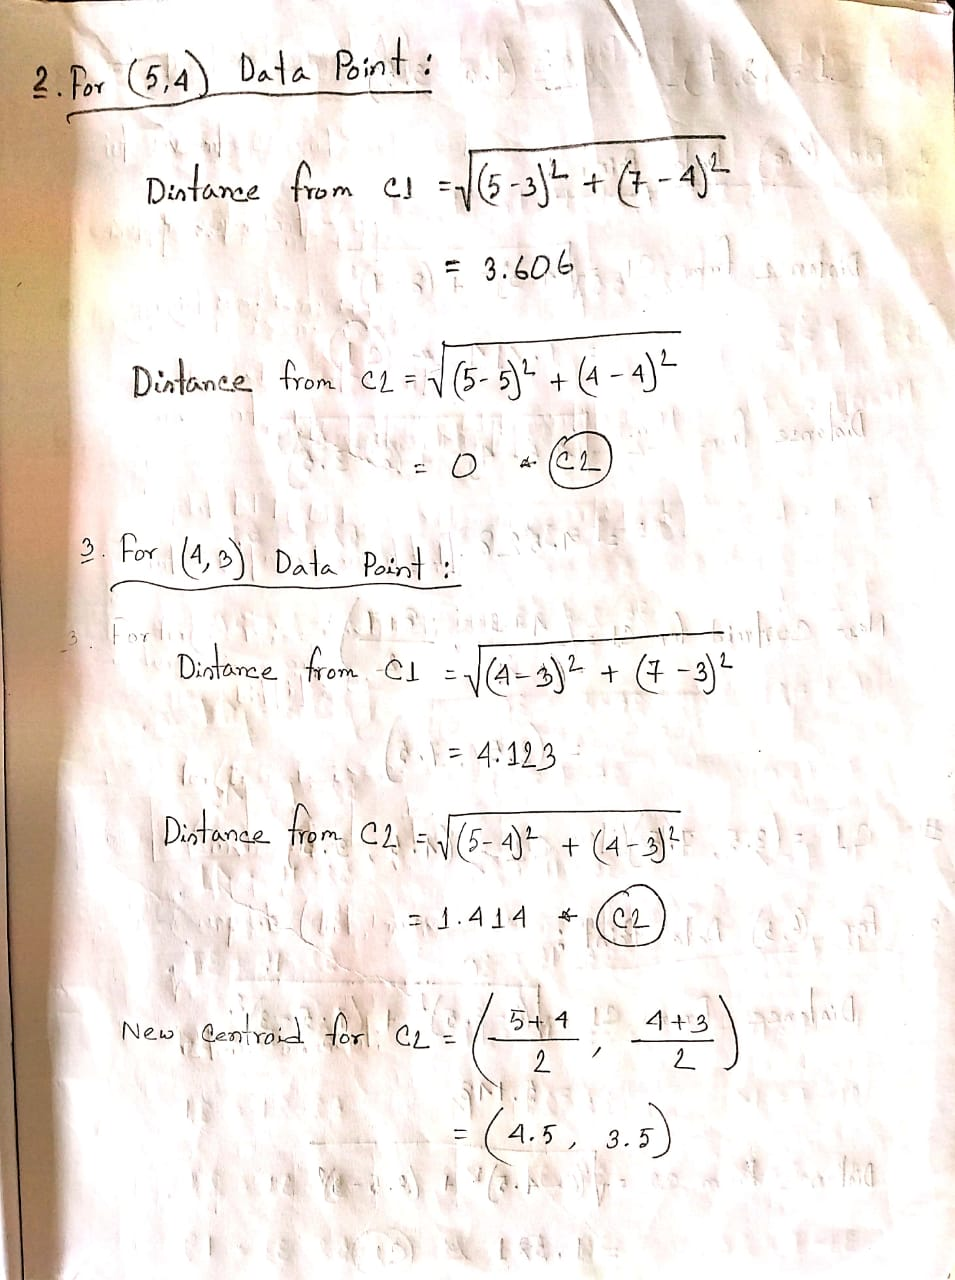

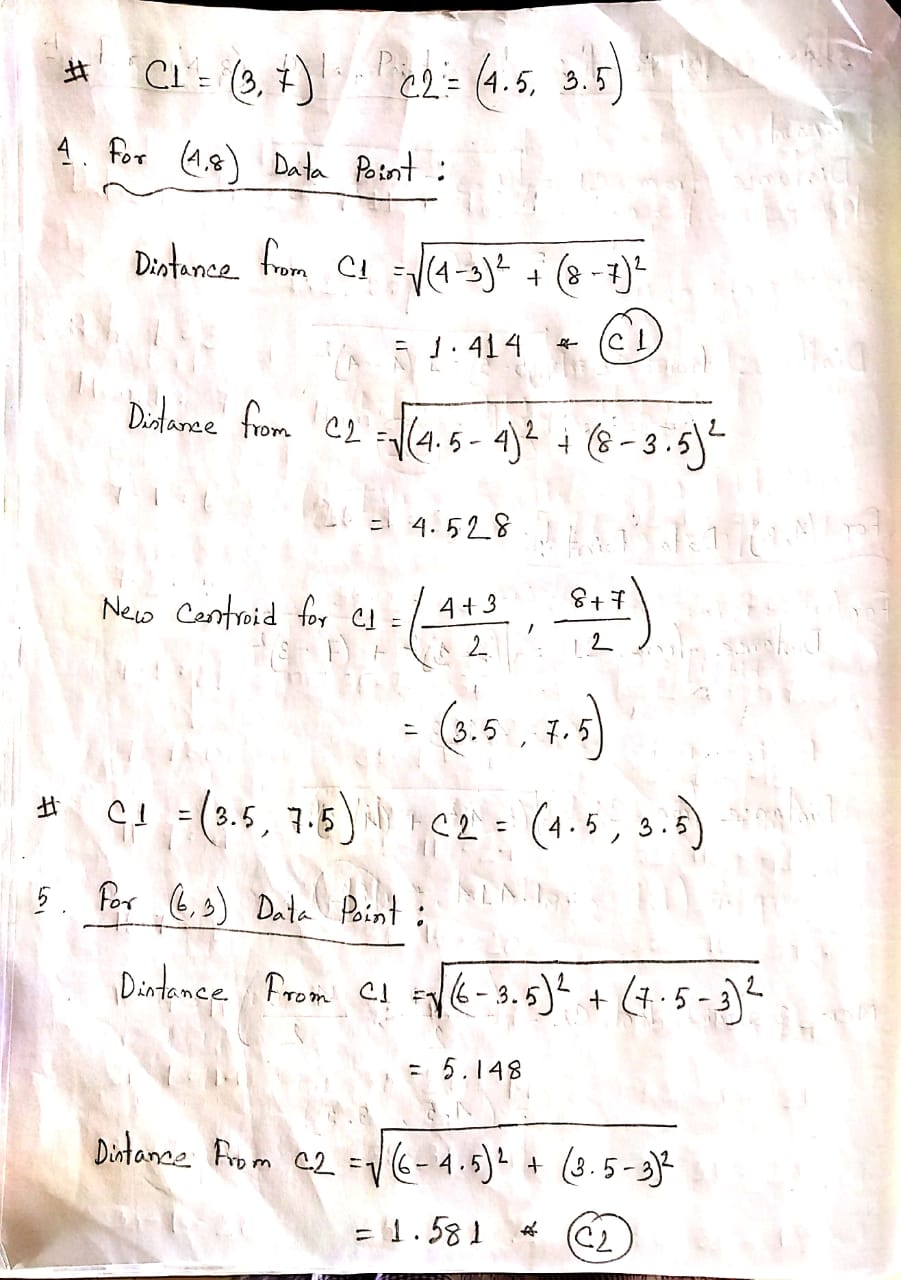

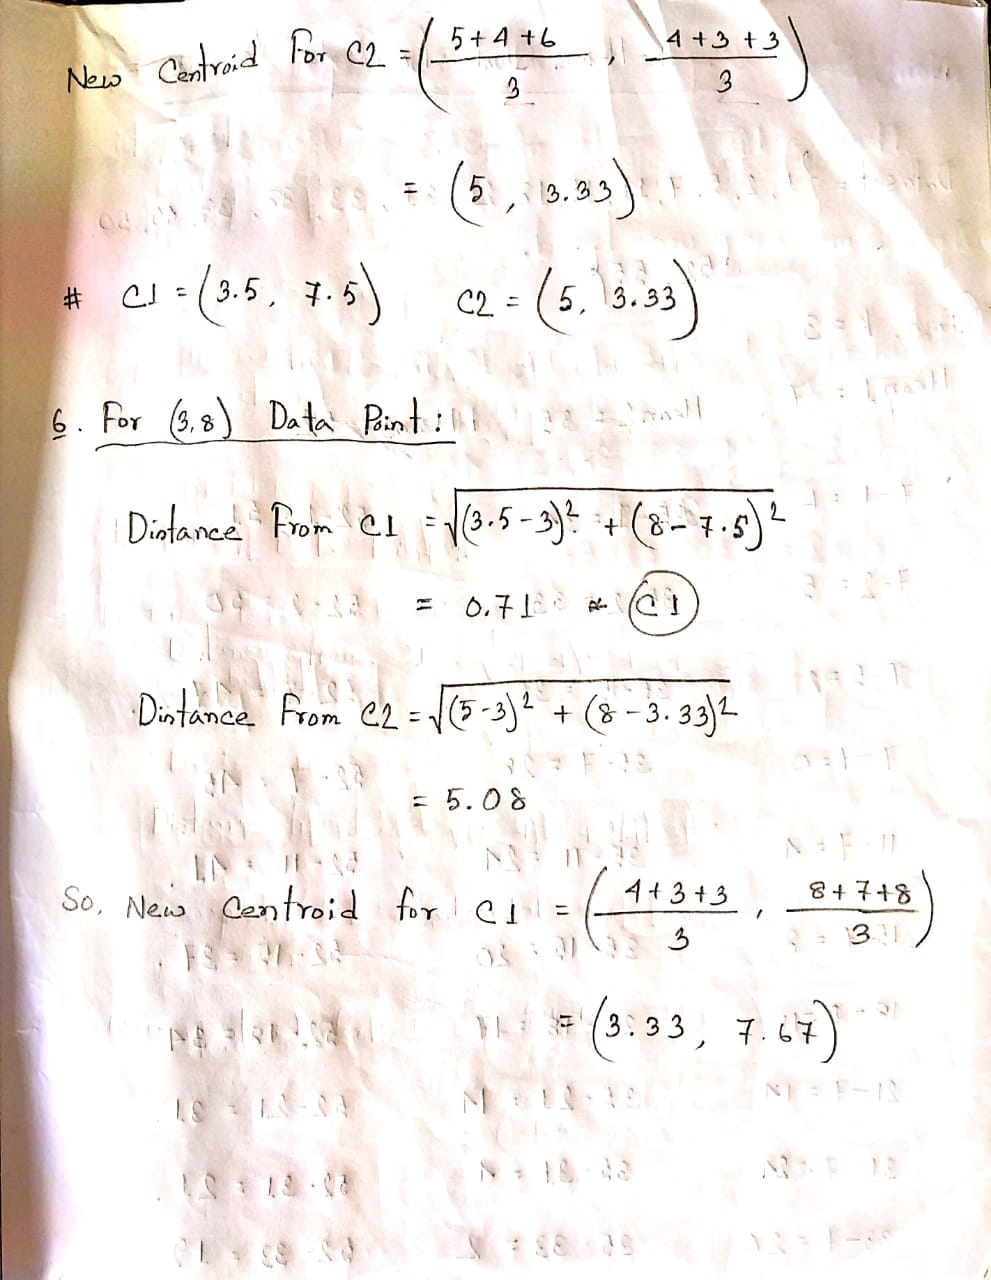

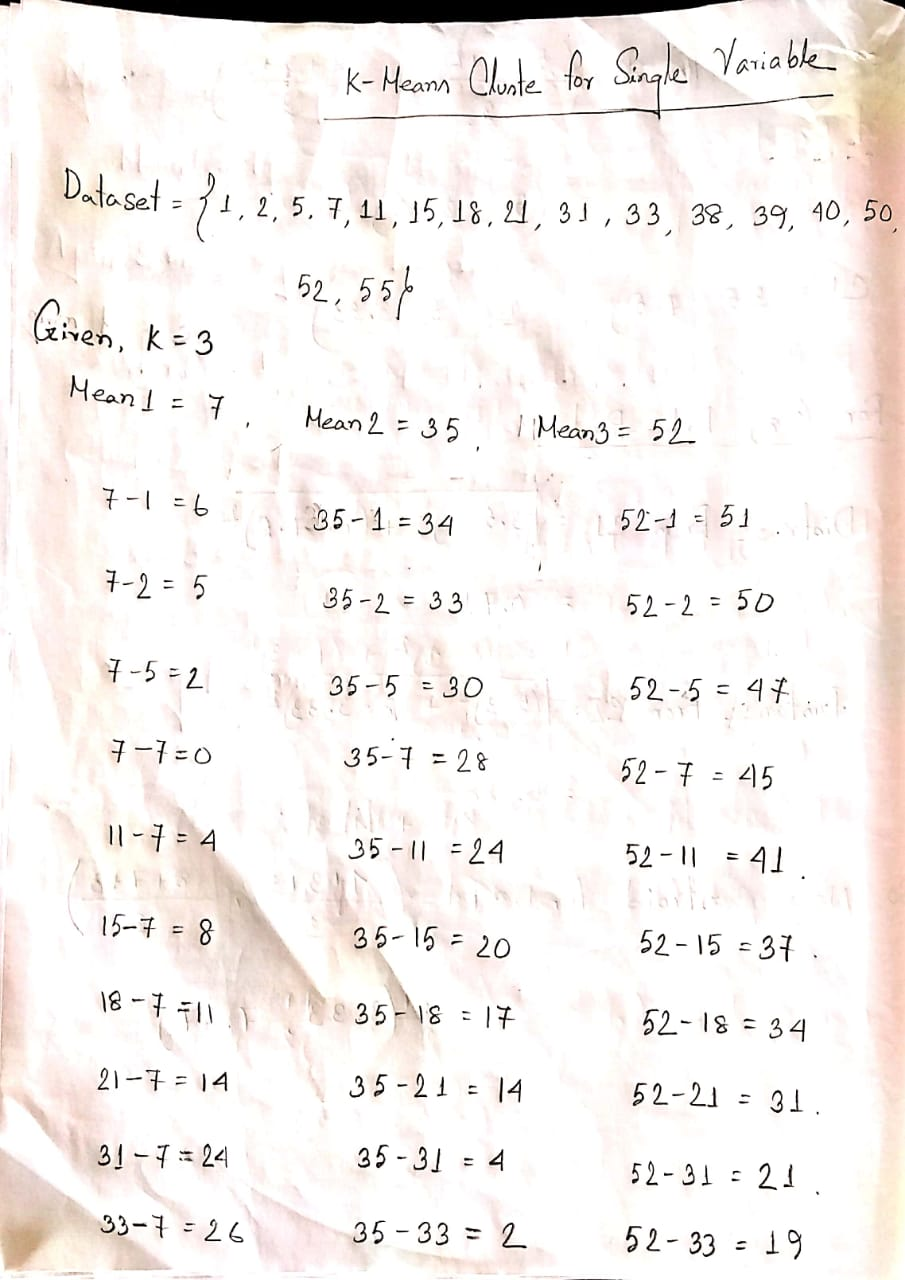

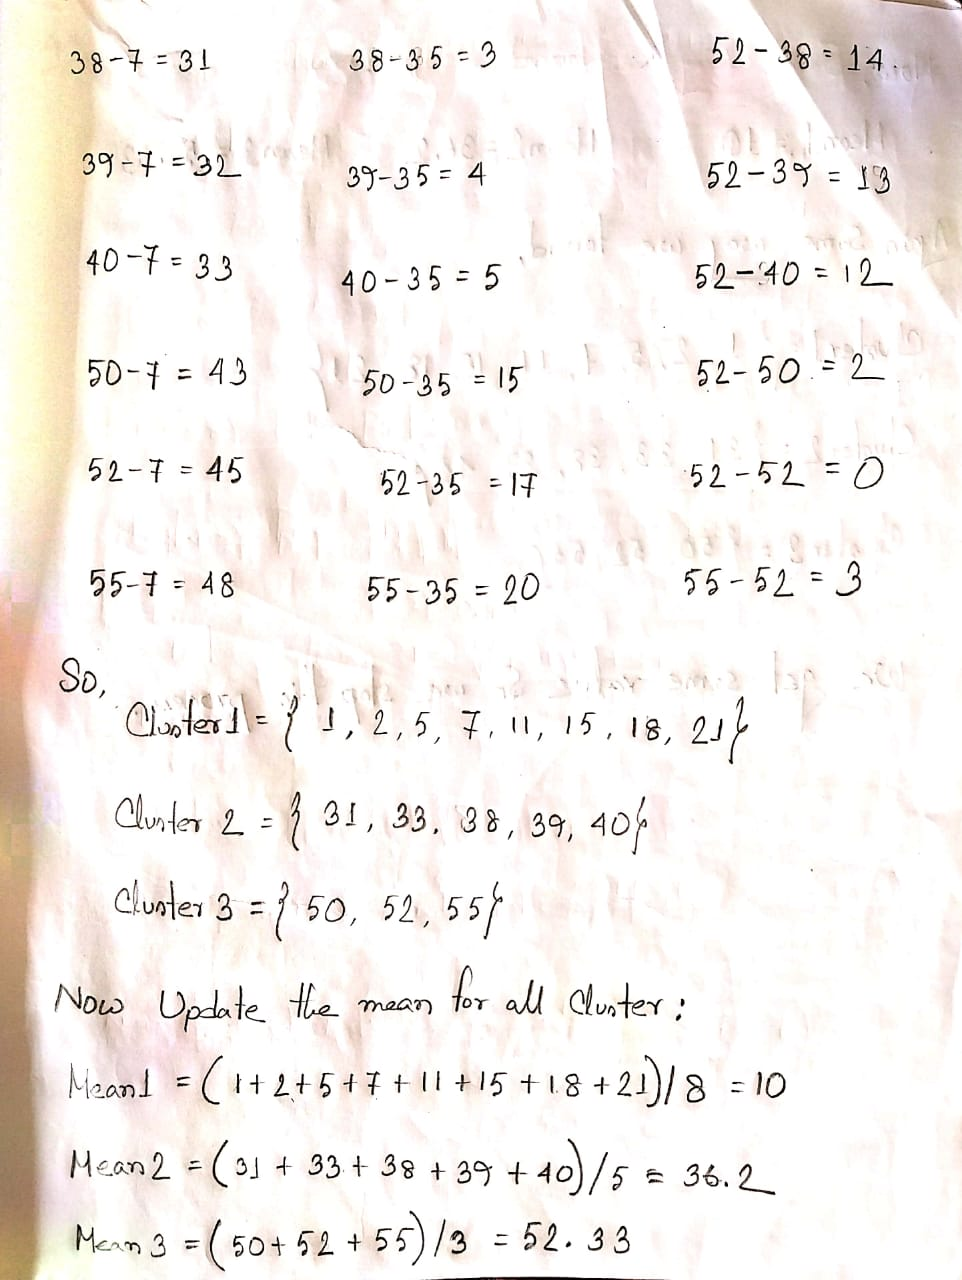

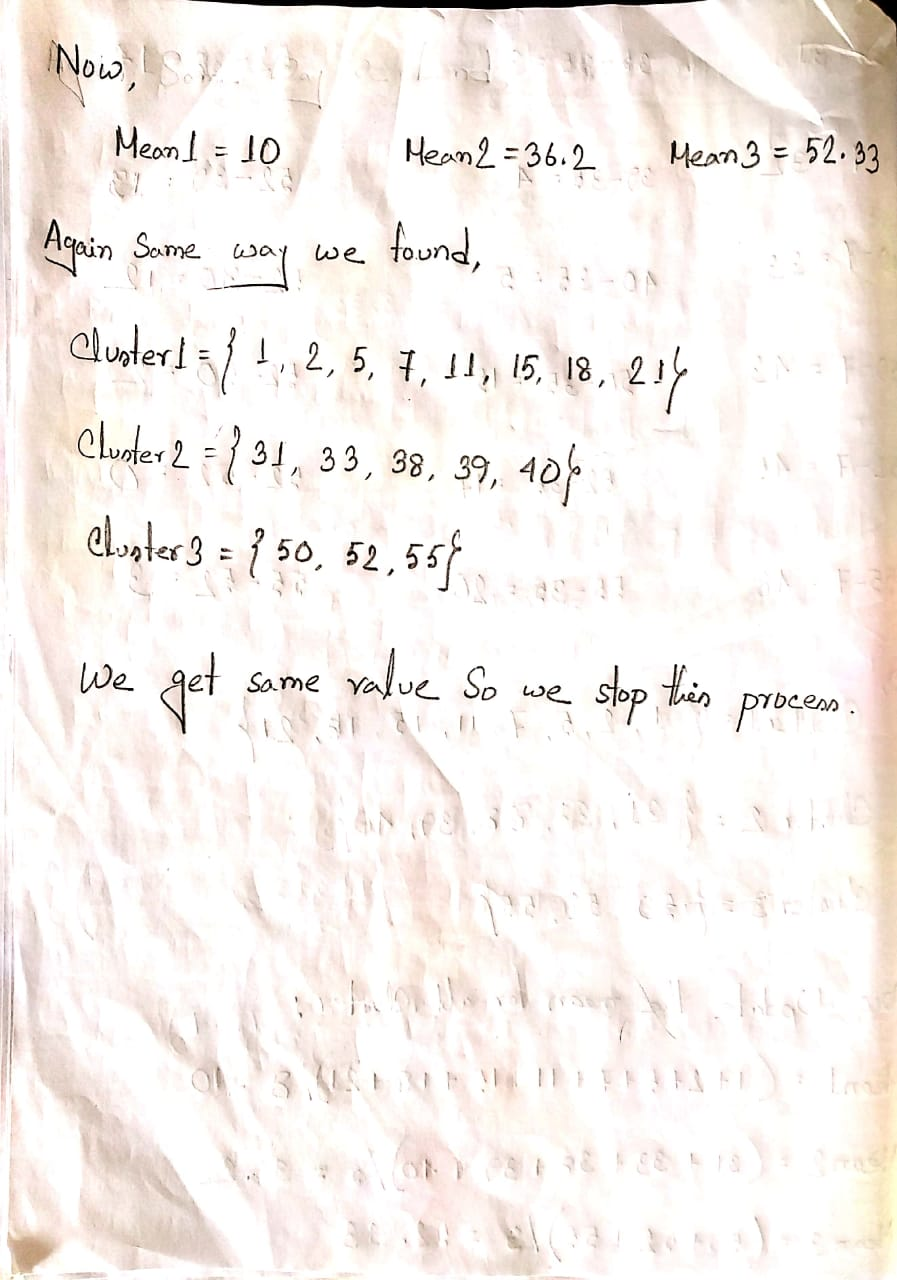

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [ ]:
data = pandas.read_csv('/content/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Rename columns

data.rename(columns={'CustomerID' : 'id', 'Annual Income (k$)' : 'income', 'Spending Score (1-100)' : 'score'}, inplace=True)

data.head()

,id,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Rows and Columns Count

data.shape

(200, 5)

In [ ]:
# Null Value Check for Data File

data.isnull().values.any()

False

In [ ]:
# Data file discribe

data.describe()

,id,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


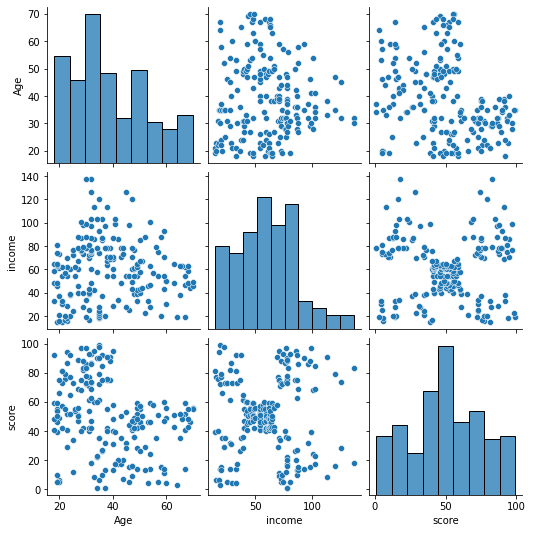

In [ ]:
# Pair Plat

seaborn.pairplot(data[['Age', 'income', 'score']])

seaborn.set()

In [ ]:
# Create kmeans cluster object
# define number of cluster by n_clusters parameter

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)

In [ ]:
# train object

kmeans.fit(data[['score', 'income']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Now see 5 cluster centroid

kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154]])

In [ ]:
# New feature add in dataset

data['score_income_cluster'] = kmeans.labels_

data.head()

,id,Gender,Age,income,score,score_income_cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [ ]:
# count each cluster number of data point

data['score_income_cluster'].value_counts()

1    81
4    39
3    35
0    23
2    22
Name: score_income_cluster, dtype: int64

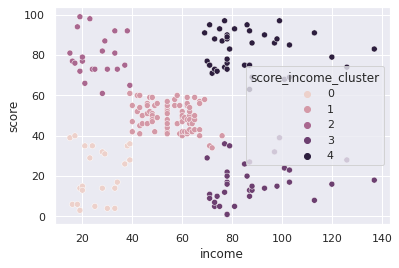

In [ ]:
# polt

seaborn.scatterplot(x='income', y='score', hue='score_income_cluster', data=data)

seaborn.set()

In [ ]:
# train object

kmeans = KMeans(n_clusters=2)

kmeans.fit(data[['score', 'Age']])

kmeans.cluster_centers_

array([[32.88695652, 46.16521739],
       [73.62352941, 28.95294118]])

In [ ]:
data['score_age_cluster'] = kmeans.labels_

data.head()

,id,Gender,Age,income,score,score_income_cluster,score_age_cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,0,0


In [ ]:
# each cluster count

data['score_age_cluster'].value_counts()

0    115
1     85
Name: score_age_cluster, dtype: int64

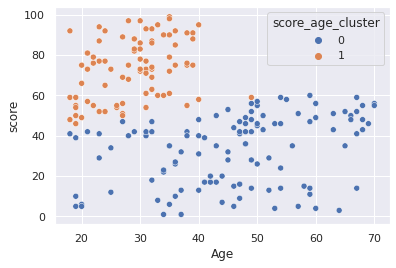

In [ ]:
# plot

seaborn.scatterplot(x='Age', y='score', hue='score_age_cluster', data=data)
seaborn.set()

In [ ]:
# Elbow Method
# WCSS is the sum of squared distance between each point and the centroid in a cluster.
# we calculate wcss value for 1 to 12 cluster and put it into array for income and score
# Normally wcss value is high when cluster size is small

# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

wcss = []

for k in range(1, 12):
  km = KMeans(n_clusters=k)
  km.fit(data[['income', 'score']])
  wcss.append(km.inertia_)


In [ ]:
# print wcss array

wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30241.34361793659,
 25029.25342493588,
 21826.936303231654,
 19636.753964898147,
 17595.28888108518]

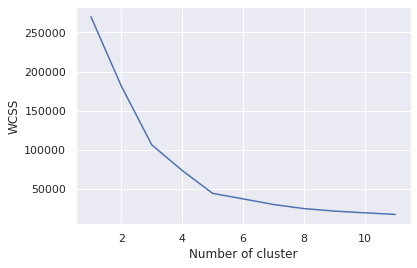

In [ ]:
# Now plot wcss vs cluster plot

x = range(1, 12)
y = wcss

plt.plot(x, y)
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

plt.show()

In [ ]:
# Now calculate wcss for score and age

wcss = []

for k in range(1, 15):
  km = KMeans(n_clusters=k)
  km.fit(data[['Age', 'score']])
  wcss.append(km.inertia_)


In [ ]:
# print wcss value

wcss

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23810.462233071365,
 19513.29621980359,
 15514.19313435103,
 13012.800984809695,
 11515.201236402487,
 10114.421708163012,
 9510.847311769614,
 8845.445199592887,
 8149.434886991234,
 7236.292859729598]

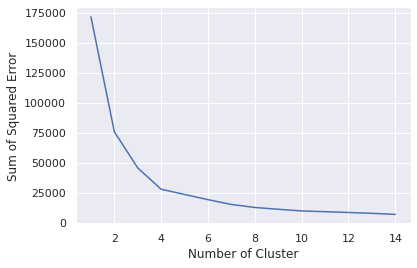

In [ ]:
# plot wcss vs cluster graph

x = range(1, 15)
y = wcss

plt.plot(x, y)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error')

plt.show()